In [2]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)


Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
dbname = 'combined_profiling'
username = 'along528'
pswd = 'password'
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

In [14]:
import process
from modeling import categorize
data= process.add_features(process.get_data())


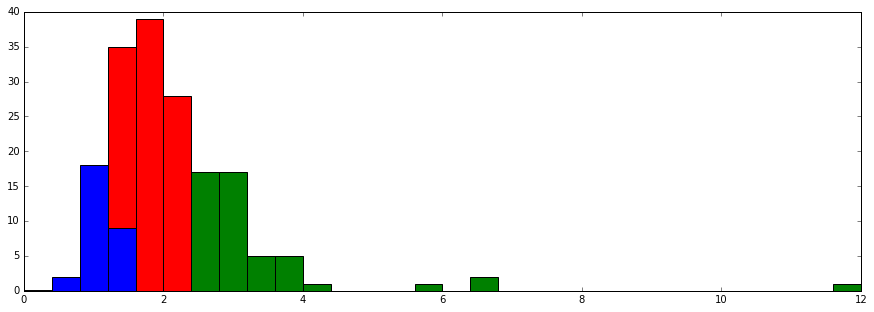

In [22]:
split_rpsi = []
for category in data['rpsi'].map(categorize).unique().tolist():
    tmpdata = data[data['rpsi'].map(categorize)==category]
    plt.hist(tmpdata['rpsi'].tolist(),bins=30,range=[0,12])

(array([  0.,   0.,   1.,   1.,   7.,  11.,  19.,  25.,  24.,  15.,  17.,
         11.,   7.,  13.,  10.,   7.,   3.,   2.,   1.,   4.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.]),
 array([  0. ,   0.2,   0.4,   0.6,   0.8,   1. ,   1.2,   1.4,   1.6,
          1.8,   2. ,   2.2,   2.4,   2.6,   2.8,   3. ,   3.2,   3.4,
          3.6,   3.8,   4. ,   4.2,   4.4,   4.6,   4.8,   5. ,   5.2,
          5.4,   5.6,   5.8,   6. ,   6.2,   6.4,   6.6,   6.8,   7. ,
          7.2,   7.4,   7.6,   7.8,   8. ,   8.2,   8.4,   8.6,   8.8,
          9. ,   9.2,   9.4,   9.6,   9.8,  10. ,  10.2,  10.4,  10.6,
         10.8,  11. ,  11.2,  11.4,  11.6,  11.8,  12. ]),
 <a list of 60 Patch objects>)

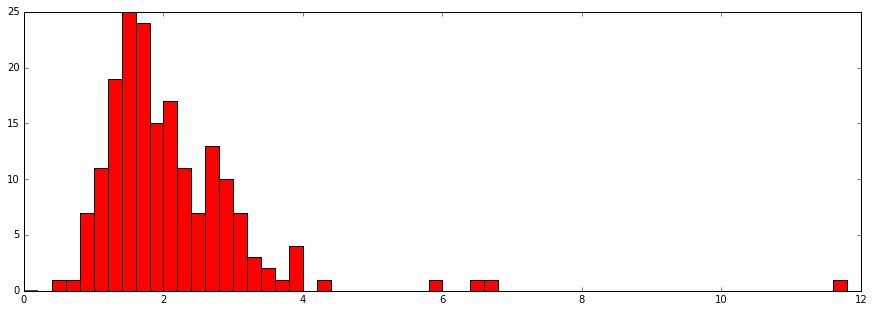

In [12]:
plt.hist(data['rpsi'].tolist(),bins=60,range=[0,12])